In [1]:
!pip install sentence-transformers faiss-cpu numpy pandas matplotlib seaborn scikit-learn

In [2]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
import faiss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler

C:\Users\Siddhesh Patil\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
C:\Users\Siddhesh Patil\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\utils\generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


In [9]:
# Load datasets
client_data = pd.read_csv('client_data.csv')
freelancers_data = pd.read_csv('freelancers_dataset_specialized_new.csv')

# Correct column names based on provided headers
client_data.columns = ['client_id', 'Job_Title', 'Description', 'Merged_Category', 'EX_level_demand']
freelancers_data.columns = ['FREELANCER', 'Skills', 'Experience_Level', 'Years_of_Experience', 'Description', 'Projects', 'Budget_Hourly', 'Budget_Project', 'Location']

# Display basic info
print("Client Data Info:")
print(client_data.info())
print("\nFreelancers Data Info:")
print(freelancers_data.info())

# Display first few rows
print("\nClient Data Sample:")
print(client_data.head())
print("\nFreelancers Data Sample:")
print(freelancers_data.head())

Client Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56933 entries, 0 to 56932
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   client_id        56933 non-null  int64 
 1   Job_Title        56933 non-null  object
 2   Description      56933 non-null  object
 3   Merged_Category  56567 non-null  object
 4   EX_level_demand  56933 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB
None

Freelancers Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   FREELANCER           10000 non-null  object
 1   Skills               10000 non-null  object
 2   Experience_Level     10000 non-null  object
 3   Years_of_Experience  10000 non-null  int64 
 4   Description          10000 non-null  object
 5   Projects             1000

In [11]:
# Clean column names (remove spaces, fix typos)
client_data.columns = client_data.columns.str.replace(' ', '_').str.strip()
freelancers_data.columns = freelancers_data.columns.str.replace(' ', '_').str.strip()

# Combine text fields for better embeddings (using description, skills, title)
client_data['Combined_Text'] = client_data['Job_Title'] + ' ' + client_data['Description'] + ' ' + client_data['Merged_Category']
freelancers_data['Combined_Text'] = freelancers_data['Skills'] + ' ' + freelancers_data['Description']

# Handle missing values
client_data = client_data.fillna('')
freelancers_data = freelancers_data.fillna('')

# Display preprocessed data
print("\nPreprocessed Client Data Sample:")
print(client_data[['client_id', 'Combined_Text']].head())
print("\nPreprocessed Freelancers Data Sample:")
print(freelancers_data[['FREELANCER', 'Combined_Text']].head())


Preprocessed Client Data Sample:
   client_id                                      Combined_Text
0          1  Power bi specialist freelance Already data poo...
1          2  Case Study (on-demand delivery startup) Hi,\n\...
2          3  File Maker Pro Reports, Charts, Query and Ongo...
3          4  Implementation of EleutherAI/gpt-neox-20b As a...
4          5  BI and Data Engineer for Upwork Finance System...

Preprocessed Freelancers Data Sample:
  FREELANCER                                      Combined_Text
0      F0001  Mobile Development: hybrid app development, an...
1      F0002  Education & Training: training online lms, lea...
2      F0003  Cybersecurity: information security consultati...
3      F0004  Education & Training: training, teaching; Gene...
4      F0005  DevOps: azure blockchain service, azure app se...


In [12]:
# Load MiniLM model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for Freelancer text (simulating precomputation at profile creation)
freelancer_embeddings = model.encode(freelancers_data['Combined_Text'].tolist(), convert_to_numpy=True, show_progress_bar=True)
print("Freelancer embeddings shape:", freelancer_embeddings.shape)

# Simulate storing embeddings in a database by saving to a file (in practice, you'd use a database)
np.save('freelancer_embeddings.npy', freelancer_embeddings)

# Build Faiss index for Freelancers (simulating precomputed index)
dimension = 384
index = faiss.IndexFlatL2(dimension)
index.add(freelancer_embeddings)

# Verify number of vectors in index
print("Number of Freelancers in index:", index.ntotal)

C:\Users\Siddhesh Patil\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
C:\Users\Siddhesh Patil\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\utils\generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
C:\Users\Siddhesh Patil\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

C:\Users\Siddhesh Patil\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Siddhesh Patil\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

Freelancer embeddings shape: (10000, 384)
Number of Freelancers in index: 10000


In [13]:
# Function to recommend top N Freelancers for a project with experience filtering
def recommend_freelancers_at_upload(project_text, project_level, model, index, freelancers_df, top_n=5):
    # Generate embedding for the project (at upload time)
    project_embedding = model.encode([project_text], convert_to_numpy=True)
    
    # Filter Freelancers by experience level
    level_mapping = {'Entry': 'Entry Leve', 'Intermediate': 'Intermedi', 'Expert': 'Expert'}
    expected_level = level_mapping.get(project_level, 'Intermedi')
    filtered_freelancers = freelancers_df[freelancers_df['Experience_Level'].str.contains(expected_level, case=False)]
    
    if filtered_freelancers.empty:
        return pd.DataFrame(), None
    
    filtered_indices = filtered_freelancers.index.to_numpy()
    filtered_embeddings = freelancer_embeddings[filtered_indices]
    filtered_index = faiss.IndexFlatL2(dimension)
    filtered_index.add(filtered_embeddings)
    
    # Search for top N nearest neighbors
    distances, indices = filtered_index.search(project_embedding, top_n)
    recommended = filtered_freelancers.iloc[indices[0]].copy()
    recommended['Distance'] = distances[0]
    return recommended

# Simulate recommending for a subset of projects (first 5 for demonstration)
subset_projects = client_data.head(5)
recommendations = []

for i, project in subset_projects.iterrows():
    project_text = project['Combined_Text']
    project_level = project['EX_level_demand']
    recommended = recommend_freelancers_at_upload(project_text, project_level, model, index, freelancers_data)
    recommended['Project_ID'] = project['client_id']
    recommendations.append(recommended)

# Combine recommendations
recommendations_df = pd.concat(recommendations, ignore_index=True)

# Display recommendations
print("\nRecommendations for Subset of Projects:")
print(recommendations_df[['Project_ID', 'FREELANCER', 'Skills', 'Experience_Level', 'Distance']])


Recommendations for Subset of Projects:
    Project_ID FREELANCER                                             Skills  \
0            1      F0943  Data Science: microsoft power bi, support vect...   
1            1      F3763  Data Science: microsoft power bi, data wrangli...   
2            1      F0882  Data Science: microsoft power bi, looker, pyth...   
3            1      F1664  Data Science: microsoft power bi, time series ...   
4            1      F4798  Data Science: artificial intelligence, unsuper...   
5            2      F3049  Business & Consulting: business analysis, impl...   
6            2      F8328  Business & Consulting: business analysis, corp...   
7            2      F0271  Business & Consulting: company research, busin...   
8            2      F7492  Business & Consulting: relationship management...   
9            2      F2918  Business & Consulting: corporate governance, b...   
10           3      F5780   Data Science: report writing, tableau; General:    

In [14]:
# Simulate ground truth: Assume Freelancers with matching skills are relevant
def simulate_ground_truth(project, freelancers_df):
    project_skills = project['Merged_Category'].lower().split(', ')
    relevant_freelancers = []
    for idx, freelancer in freelancers_df.iterrows():
        freelancer_skills = freelancer['Skills'].lower()
        if any(skill in freelancer_skills for skill in project_skills):
            relevant_freelancers.append(freelancer['FREELANCER'])
    return relevant_freelancers

# Evaluate precision@k, recall@k, and MRR
def evaluate_recommendations(recommendations_df, client_data, freelancers_df, k=5):
    precisions, recalls, mrrs = [], [], []
    
    for project_id in recommendations_df['Project_ID'].unique():
        project = client_data[client_data['client_id'] == project_id].iloc[0]
        recommended = recommendations_df[recommendations_df['Project_ID'] == project_id]['FREELANCER'].tolist()[:k]
        relevant = simulate_ground_truth(project, freelancers_df)
        
        # Precision@k
        relevant_in_recommended = len(set(recommended).intersection(relevant))
        precision = relevant_in_recommended / k
        precisions.append(precision)
        
        # Recall@k
        recall = relevant_in_recommended / len(relevant) if relevant else 0
        recalls.append(recall)
        
        # MRR
        for rank, freelancer in enumerate(recommended, 1):
            if freelancer in relevant:
                mrrs.append(1 / rank)
                break
        else:
            mrrs.append(0)
    
    return np.mean(precisions), np.mean(recalls), np.mean(mrrs)

# Evaluate on subset
precision, recall, mrr = evaluate_recommendations(recommendations_df, subset_projects, freelancers_data)
print(f"\nEvaluation Metrics (k=5):")
print(f"Precision@5: {precision:.4f}")
print(f"Recall@5: {recall:.4f}")
print(f"MRR: {mrr:.4f}")


Evaluation Metrics (k=5):
Precision@5: 0.7600
Recall@5: 0.0129
MRR: 1.0000


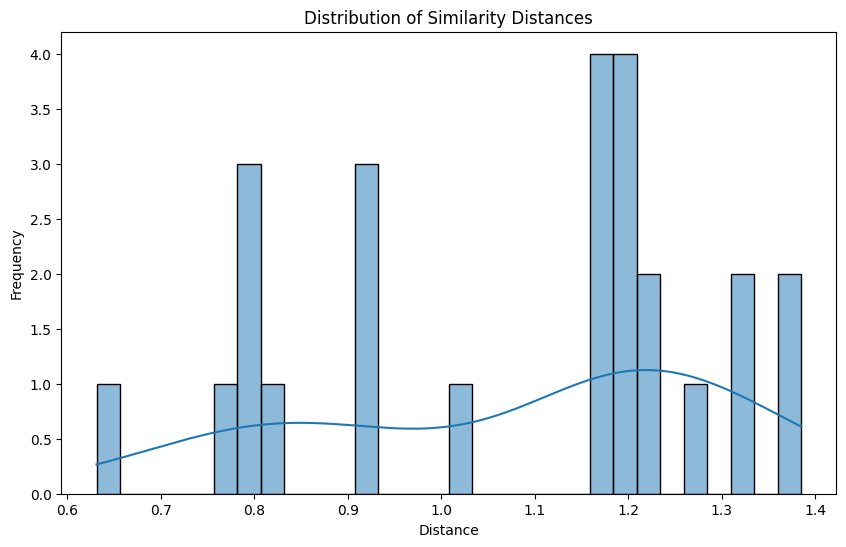

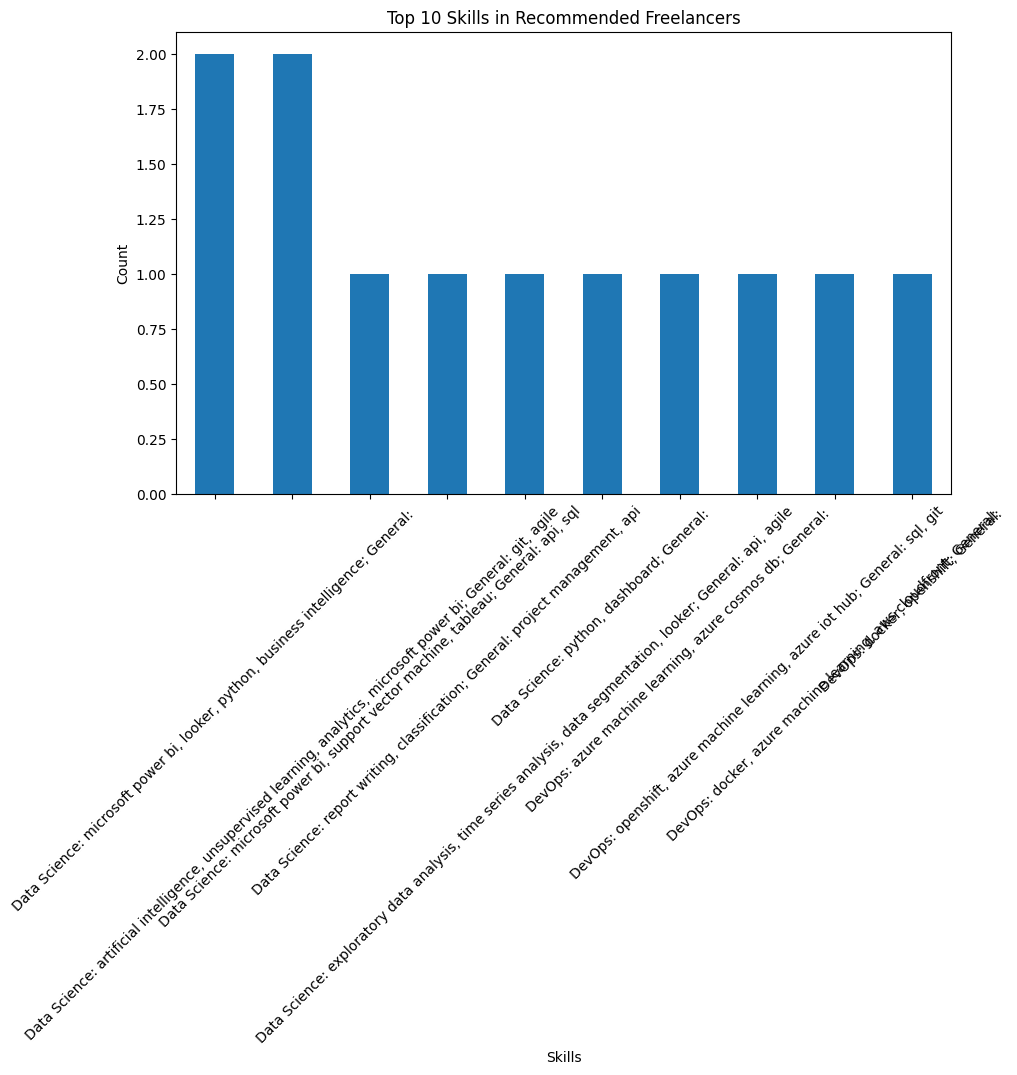

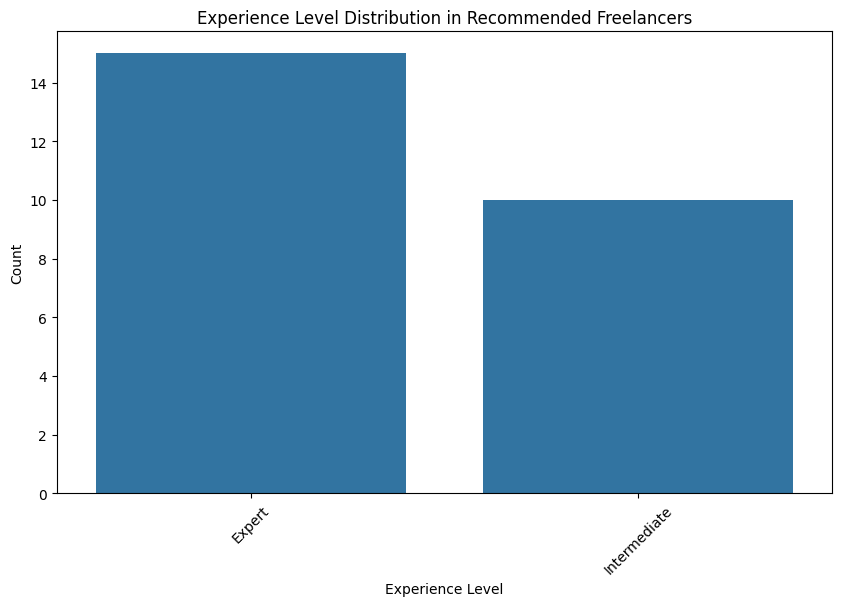

In [15]:
# Visualize distance distribution
plt.figure(figsize=(10, 6))
sns.histplot(recommendations_df['Distance'], bins=30, kde=True)
plt.title('Distribution of Similarity Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

# Visualize top skills in recommendations
top_skills = recommendations_df['Skills'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_skills.plot(kind='bar')
plt.title('Top 10 Skills in Recommended Freelancers')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualize experience level distribution in recommendations
plt.figure(figsize=(10, 6))
sns.countplot(data=recommendations_df, x='Experience_Level')
plt.title('Experience Level Distribution in Recommended Freelancers')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Filter by minimum rating (e.g., 4.0)
filtered_freelancers = filtered_freelancers[filtered_freelancers['Ratings'] >= 4.0]
# Sort by rating after similarity search
recommended = recommended.sort_values(by='Ratings', ascending=False)

NameError: name 'filtered_freelancers' is not defined